In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense , Input , BatchNormalization , Flatten , Reshape, Activation
from tensorflow.keras.optimizers import Adam, SGD
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/SudoNet/sudoku.csv')

In [3]:
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [4]:
str2np = lambda string : np.array(list(map(int,list(string)))).reshape(9,9,1)
str2label = lambda string : np.array(list(map(int,list(string)))).reshape(81,1) - 1

In [5]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [6]:
X.shape

(1000000,)

In [7]:
X[0]

'004300209005009001070060043006002087190007400050083000600000105003508690042910300'

In [8]:
features = []

In [9]:
for i in range(len(X)):
    features.append(str2np(X[i]))

In [10]:
features = np.array(features)

In [11]:
features.shape

(1000000, 9, 9, 1)

In [12]:
labels = []

In [13]:
for i in range(len(y)):
    labels.append(str2label(y[i]))

In [14]:
labels = np.array(labels)

In [15]:
labels.shape

(1000000, 81, 1)

In [16]:
def mormalize_data(data,count):
    data = data/count
    data -= 0.5
    return data

In [17]:
features = mormalize_data(features,9)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=101)

In [20]:
del(labels)
del(features)

In [21]:
X_train.shape

(670000, 9, 9, 1)

In [22]:
y_train.shape

(670000, 81, 1)

In [23]:
tf.keras.backend.clear_session()

x = Input(shape=(9,9,1))

out = Conv2D(64, kernel_size=(3,3) ,activation='relu' , padding='same')(x)
out = BatchNormalization()(out)
out = Conv2D(64, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)
out = Conv2D(128, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = Flatten()(out)

out = Dense(729)(out)
out = Reshape((-1,9))(out)
out = Activation('softmax')(out)

In [24]:
model = Model(inputs=x, outputs=out)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

In [48]:
acc_thresh = 0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > acc_thresh):
            print("Stopping training as desired accuracy reached....")
            self.model.stop_training = True

In [49]:
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      if epoch%2 == 0:
        self.model.save("/content/drive/MyDrive/SudoNet/Model_Phase3/model_{}.h5".format(epoch))

In [50]:
myCall = myCallback()
modelSaver = ModelSaver()

## THE BASE MODEL : AFTER THIS, I WILL DO HYPERPARAM TUNING

In [28]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50 , validation_data=(X_test,y_test) , callbacks=[myCall])

Epoch 1/50
5235/5235 [==============================] - 125s 18ms/step - loss: 0.5540 - accuracy: 0.7649 - val_loss: 0.3802 - val_accuracy: 0.8220
Epoch 2/50
5235/5235 [==============================] - 94s 18ms/step - loss: 0.3612 - accuracy: 0.8308 - val_loss: 0.3546 - val_accuracy: 0.8333
Epoch 3/50
5235/5235 [==============================] - 94s 18ms/step - loss: 0.3368 - accuracy: 0.8442 - val_loss: 0.3458 - val_accuracy: 0.8385
Epoch 4/50
5235/5235 [==============================] - 94s 18ms/step - loss: 0.3187 - accuracy: 0.8550 - val_loss: 0.3446 - val_accuracy: 0.8399
Epoch 5/50
5235/5235 [==============================] - 94s 18ms/step - loss: 0.3062 - accuracy: 0.8624 - val_loss: 0.3484 - val_accuracy: 0.8396
Epoch 6/50
5235/5235 [==============================] - 93s 18ms/step - loss: 0.2977 - accuracy: 0.8673 - val_loss: 0.3478 - val_accuracy: 0.8399
Epoch 7/50
5235/5235 [==============================] - 93s 18ms/step - loss: 0.2916 - accuracy: 0.8707 - val_loss: 0.3502 

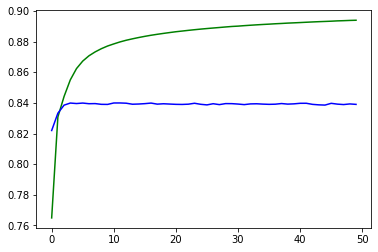

In [30]:
plt.plot(history.history['accuracy'] , color='green')
plt.plot(history.history['val_accuracy'] , color='blue')


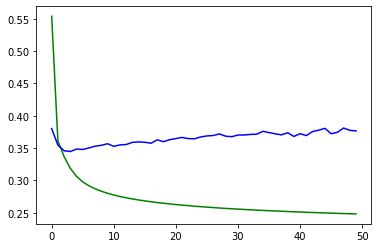

In [31]:
plt.plot(history.history['loss'] , color='green')
plt.plot(history.history['val_loss'] , color='blue')

In [32]:
model.save('/content/drive/MyDrive/SudoNet/model_64_64_128--89_83.h5')

In [51]:
tf.keras.backend.clear_session()

x = Input(shape=(9,9,1))

out = Conv2D(64, kernel_size=(3,3) ,activation='relu' , padding='same')(x)
out = BatchNormalization()(out)
out = Conv2D(64, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)

out = Conv2D(128, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)
out = Conv2D(128, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)

out = Conv2D(256, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)
out = Conv2D(256, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)

out = Conv2D(512, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)
out = Conv2D(512, kernel_size=(3,3) ,activation='relu' , padding='same')(out)
out = BatchNormalization()(out)


out = Flatten()(out)
out = Dense(729)(out)
out = Reshape((-1,9))(out)
out = Activation('softmax')(out)

model = Model(inputs=x, outputs=out)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, epochs=20 , validation_data=(X_test,y_test) , callbacks=[myCall,modelSaver])


Epoch 1/20
2618/2618 [==============================] - 698s 265ms/step - loss: 0.7233 - accuracy: 0.7527 - val_loss: 0.3800 - val_accuracy: 0.8352
Epoch 2/20
2618/2618 [==============================] - 694s 265ms/step - loss: 0.3119 - accuracy: 0.8679 - val_loss: 0.2697 - val_accuracy: 0.8880
Epoch 3/20
2618/2618 [==============================] - 693s 265ms/step - loss: 0.2134 - accuracy: 0.9132 - val_loss: 0.2018 - val_accuracy: 0.9192
Epoch 4/20
2618/2618 [==============================] - 692s 264ms/step - loss: 0.1460 - accuracy: 0.9424 - val_loss: 0.1639 - val_accuracy: 0.9359
Epoch 5/20
2618/2618 [==============================] - 690s 263ms/step - loss: 0.0980 - accuracy: 0.9622 - val_loss: 0.1531 - val_accuracy: 0.9421
Epoch 6/20
2618/2618 [==============================] - 689s 263ms/step - loss: 0.0646 - accuracy: 0.9754 - val_loss: 0.1653 - val_accuracy: 0.9432
Epoch 7/20
2618/2618 [==============================] - 689s 263ms/step - loss: 0.0432 - accuracy: 0.9837 - val_

In [52]:
strn = '''
Epoch 1/20
   6/2618 [..............................] - ETA: 9:53 - loss: 3.6018 - accuracy: 0.1205WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0810s vs `on_train_batch_end` time: 0.1395s). Check your callbacks.
2618/2618 [==============================] - 698s 265ms/step - loss: 0.7233 - accuracy: 0.7527 - val_loss: 0.3800 - val_accuracy: 0.8352
Epoch 2/20
2618/2618 [==============================] - 694s 265ms/step - loss: 0.3119 - accuracy: 0.8679 - val_loss: 0.2697 - val_accuracy: 0.8880
Epoch 3/20
2618/2618 [==============================] - 693s 265ms/step - loss: 0.2134 - accuracy: 0.9132 - val_loss: 0.2018 - val_accuracy: 0.9192
Epoch 4/20
2618/2618 [==============================] - 692s 264ms/step - loss: 0.1460 - accuracy: 0.9424 - val_loss: 0.1639 - val_accuracy: 0.9359
Epoch 5/20
2618/2618 [==============================] - 690s 263ms/step - loss: 0.0980 - accuracy: 0.9622 - val_loss: 0.1531 - val_accuracy: 0.9421
Epoch 6/20
2618/2618 [==============================] - 689s 263ms/step - loss: 0.0646 - accuracy: 0.9754 - val_loss: 0.1653 - val_accuracy: 0.9432
Epoch 7/20
2618/2618 [==============================] - 689s 263ms/step - loss: 0.0432 - accuracy: 0.9837 - val_loss: 0.1865 - val_accuracy: 0.9431
Epoch 8/20
2618/2618 [==============================] - 690s 263ms/step - loss: 0.0313 - accuracy: 0.9883 - val_loss: 0.2016 - val_accuracy: 0.9439
Epoch 9/20
2618/2618 [==============================] - 690s 264ms/step - loss: 0.0244 - accuracy: 0.9909 - val_loss: 0.2178 - val_accuracy: 0.9452
Stopping training as desired accuracy reached....
'''

with open("/content/drive/MyDrive/SudoNet/Model_Phase3/train_logs.txt",'w') as fileW:
  fileW.write(strn)

In [43]:
model.save("/content/drive/MyDrive/SudoNet/Model_Phase2/model_5.h5")

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9, 9, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512   

In [54]:
strn = '''
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 9, 9, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
batch_normalization_3 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
batch_normalization_4 (Batch (None, 9, 9, 256)         1024      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 256)         590080    
_________________________________________________________________
batch_normalization_5 (Batch (None, 9, 9, 256)         1024      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 512)         1180160   
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 512)         2048      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 512)         2359808   
_________________________________________________________________
batch_normalization_7 (Batch (None, 9, 9, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 729)               30233817  
_________________________________________________________________
reshape (Reshape)            (None, 81, 9)             0         
_________________________________________________________________
activation (Activation)      (None, 81, 9)             0         
=================================================================
Total params: 34,925,721
Trainable params: 34,921,881
Non-trainable params: 3,840

'''
with open("/content/drive/MyDrive/SudoNet/Model_Phase3/model_summary.txt",'w') as fileW:
  fileW.write(strn)

In [56]:
X_test[0].shape

(9, 9, 1)

In [82]:
sample_out = model.predict(X_train[0].reshape(1,9,9,1)).squeeze()

In [83]:
sample_out.shape

(81, 9)

In [84]:
outmatrix = []
for row in sample_out:
  outmatrix.append(np.argmax(row))

In [85]:
outmatrix = np.array(outmatrix)

In [86]:
outmatrix = outmatrix.reshape(9,9)

In [87]:
outmatrix

array([[2, 3, 1, 7, 4, 0, 8, 5, 6],
       [0, 8, 6, 5, 2, 1, 3, 4, 7],
       [4, 5, 7, 6, 3, 8, 1, 0, 2],
       [1, 4, 3, 8, 0, 2, 6, 7, 5],
       [7, 0, 8, 4, 5, 6, 2, 3, 1],
       [6, 2, 5, 1, 7, 3, 0, 8, 4],
       [5, 1, 0, 2, 8, 7, 4, 6, 3],
       [3, 6, 4, 0, 1, 5, 7, 2, 8],
       [8, 7, 2, 3, 6, 4, 5, 1, 0]])

In [79]:
y_train[0].reshape(9,9)

array([[2, 3, 1, 7, 4, 0, 8, 5, 6],
       [0, 8, 6, 5, 2, 1, 3, 4, 7],
       [4, 5, 7, 6, 3, 8, 1, 0, 2],
       [1, 4, 3, 8, 0, 2, 6, 7, 5],
       [7, 0, 8, 4, 5, 6, 2, 3, 1],
       [6, 2, 5, 1, 7, 3, 0, 8, 4],
       [5, 1, 0, 2, 8, 7, 4, 6, 3],
       [3, 6, 4, 0, 1, 5, 7, 2, 8],
       [8, 7, 2, 3, 6, 4, 5, 1, 0]])

In [80]:
# N is the size of the 2D matrix N*N
N = 9

# A utility function to print grid
def printing(arr):
	for i in range(N):
		for j in range(N):
			print(arr[i][j], end = " ")
		print()

# Checks whether it will be
# legal to assign num to the
# given row, col
def isSafe(grid, row, col, num):

	# Check if we find the same num
	# in the similar row , we
	# return false
	for x in range(9):
		if grid[row][x] == num:
			return False

	# Check if we find the same num in
	# the similar column , we
	# return false
	for x in range(9):
		if grid[x][col] == num:
			return False

	# Check if we find the same num in
	# the particular 3*3 matrix,
	# we return false
	startRow = row - row % 3
	startCol = col - col % 3
	for i in range(3):
		for j in range(3):
			if grid[i + startRow][j + startCol] == num:
				return False
	return True

# Takes a partially filled-in grid and attempts
# to assign values to all unassigned locations in
# such a way to meet the requirements for
# Sudoku solution (non-duplication across rows,
# columns, and boxes) */
def solveSuduko(grid, row, col):

	# Check if we have reached the 8th
	# row and 9th column (0
	# indexed matrix) , we are
	# returning true to avoid
	# further backtracking
	if (row == N - 1 and col == N):
		return True
	
	# Check if column value becomes 9 ,
	# we move to next row and
	# column start from 0
	if col == N:
		row += 1
		col = 0

	# Check if the current position of
	# the grid already contains
	# value >0, we iterate for next column
	if grid[row][col] > 0:
		return solveSuduko(grid, row, col + 1)
	for num in range(1, N + 1, 1):
	
		# Check if it is safe to place
		# the num (1-9) in the
		# given row ,col ->we
		# move to next column
		if isSafe(grid, row, col, num):
		
			# Assigning the num in
			# the current (row,col)
			# position of the grid
			# and assuming our assigned
			# num in the position
			# is correct
			grid[row][col] = num

			# Checking for next possibility with next
			# column
			if solveSuduko(grid, row, col + 1):
				return True

		# Removing the assigned num ,
		# since our assumption
		# was wrong , and we go for
		# next assumption with
		# diff num value
		grid[row][col] = 0
	return False

# Driver Code

# 0 means unassigned cells
grid = [[2, 3, 1, 7, 4, 0, 8, 5, 6],
       [0, 8, 6, 5, 2, 1, 3, 4, 7],
       [4, 5, 7, 6, 3, 8, 1, 0, 2],
       [1, 4, 3, 8, 0, 2, 6, 7, 5],
       [7, 0, 8, 4, 5, 6, 2, 3, 1],
       [6, 2, 5, 1, 7, 3, 0, 8, 4],
       [5, 1, 0, 2, 8, 7, 4, 6, 3],
       [3, 6, 4, 0, 1, 5, 7, 2, 8],
       [8, 7, 2, 3, 6, 4, 5, 1, 0]]

if (solveSuduko(grid, 0, 0)):
	printing(grid)
else:
	print("no solution exists ")



2 3 1 7 4 9 8 5 6 
9 8 6 5 2 1 3 4 7 
4 5 7 6 3 8 1 9 2 
1 4 3 8 9 2 6 7 5 
7 9 8 4 5 6 2 3 1 
6 2 5 1 7 3 9 8 4 
5 1 9 2 8 7 4 6 3 
3 6 4 9 1 5 7 2 8 
8 7 2 3 6 4 5 1 9 


In [89]:
print(outmatrix)

[[2 3 1 7 4 0 8 5 6]
 [0 8 6 5 2 1 3 4 7]
 [4 5 7 6 3 8 1 0 2]
 [1 4 3 8 0 2 6 7 5]
 [7 0 8 4 5 6 2 3 1]
 [6 2 5 1 7 3 0 8 4]
 [5 1 0 2 8 7 4 6 3]
 [3 6 4 0 1 5 7 2 8]
 [8 7 2 3 6 4 5 1 0]]


In [90]:
grid

[[2, 3, 1, 7, 4, 9, 8, 5, 6],
 [9, 8, 6, 5, 2, 1, 3, 4, 7],
 [4, 5, 7, 6, 3, 8, 1, 9, 2],
 [1, 4, 3, 8, 9, 2, 6, 7, 5],
 [7, 9, 8, 4, 5, 6, 2, 3, 1],
 [6, 2, 5, 1, 7, 3, 9, 8, 4],
 [5, 1, 9, 2, 8, 7, 4, 6, 3],
 [3, 6, 4, 9, 1, 5, 7, 2, 8],
 [8, 7, 2, 3, 6, 4, 5, 1, 9]]

In [91]:
np.sum(np.array(grid)==outmatrix)

72

In [92]:
np.sum(y_train[0].reshape(9,9) == np.array(grid))

72

In [93]:
outmatrix == y_train[0].reshape(9,9)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [94]:
y_train[0].reshape(9,9)

array([[2, 3, 1, 7, 4, 0, 8, 5, 6],
       [0, 8, 6, 5, 2, 1, 3, 4, 7],
       [4, 5, 7, 6, 3, 8, 1, 0, 2],
       [1, 4, 3, 8, 0, 2, 6, 7, 5],
       [7, 0, 8, 4, 5, 6, 2, 3, 1],
       [6, 2, 5, 1, 7, 3, 0, 8, 4],
       [5, 1, 0, 2, 8, 7, 4, 6, 3],
       [3, 6, 4, 0, 1, 5, 7, 2, 8],
       [8, 7, 2, 3, 6, 4, 5, 1, 0]])